evaluate_seg_costum.py 在跑

In [46]:
import pandas as pd
pd.set_option('display.max_rows', None)  # 显示所有行
pd.set_option('display.max_columns', None)  # 显示所有列

In [ ]:
import pandas as pd

# 读入两个 CSV 文件
df_hard = pd.read_csv('scale_100_hard.csv')
df_easy = pd.read_csv('scale_small.csv')
df_3 = pd.read_csv('scale_small_choco.csv')

# 删除 'pbid' 列并进行条件过滤
df_hard = df_hard.drop(columns=['pbid'])
df_easy = df_easy.drop(columns=['pbid'])
df_3 = df_3.drop(columns=['pbid'])

df_hard = df_hard[df_hard['ARG'] <= 100000]
df_easy = df_easy[df_easy['ARG'] <= 100000]
df_3 = df_3[df_3['ARG'] <= 100000]

df_hard = df_hard[df_hard['variables'] > 5]
df_easy = df_easy[df_easy['variables'] > 5]
df_3 = df_3[df_3['variables'] > 5]

# 合并三个 DataFrame
df = pd.concat([df_3, df_hard, df_easy])

# 分组聚合
grouped_df = df.groupby(['variables', 'method'], as_index=False).agg({
    'iteration_count': 'mean',
    'classcial': 'mean',
    'run_times': 'mean',
    'ARG': 'mean',
    'in_constraints_probs': 'mean',
    'best_solution_probs': 'mean',
})

# 定义需要的列
values = ["variables", "ARG", 'best_solution_probs', 'classcial', 'in_constraints_probs', 'run_times', 'iteration_count']

# 分组并把组作为索引
pivot_df = grouped_df.pivot(index=['variables'], columns='method', values=values)

# 设置方法的顺序
method_order = ['ChocoSolver', 'QtoSimplifySolver', ]  # 你可以在这里添加更多方法名

# 根据方法顺序调整列的顺序
pivot_df = pivot_df.reindex(columns=pd.MultiIndex.from_product([values, method_order]))

# 根据 'variables' 列排序
# pivot_df = pivot_df.sort_index(axis=1, level='variables')

# 输出结果
pivot_df


variables                           ARG                    \
          ChocoSolver QtoSimplifySolver ChocoSolver QtoSimplifySolver   
variables                                                               
5                 5.0               5.0    0.000000          0.000000   
6                 6.0               6.0    0.139720          0.011199   
10               10.0              10.0    0.224265          0.010986   
14               14.0              14.0    0.201480          0.029573   
15               15.0              15.0    0.399412          0.161867   
21               21.0              21.0    0.492955          0.176772   
27               27.0              27.0    0.389967          0.189979   
28               28.0              28.0    0.607520          0.410233   
36               36.0              36.0    0.548911          0.354201   
44               44.0              44.0    0.631383          0.431137   
45               45.0              45.0    0.795252          0.617124   
55               55.0              55.0    0.773547          0.599410   
65                NaN              65.0         NaN          0.617750   
66                NaN              66.0         NaN          0.818979   
78                NaN              78.0         NaN          0.716836   
91                NaN              91.0         NaN          0.902515   

          best_solution_probs                     classcial                    \
                  ChocoSolver QtoSimplifySolver ChocoSolver QtoSimplifySolver   
variables                                                                       
5                  100.000000        100.000000    0.171812          0.020102   
6                   82.185547         95.473633    0.865502          0.276543   
10                  58.876953         95.489258    1.943386          1.152335   
14                  48.166016         84.527344    4.201237          5.028595   
15                  29.460938         59.663086    8.222221         14.819700   
21                  16.329102         49.653320   18.558127         44.084647   
27                   7.857422         34.534180   42.378481         44.184767   
28                  14.198242         29.427734   47.053208        149.000837   
36                   9.822266         17.956055   84.554010         70.235532   
44                   3.228516          8.199219  162.901632        108.944039   
45                   5.652344         11.519531  144.866882         95.514772   
55                   2.640548          5.440430  226.509892        153.437412   
65                        NaN          3.265625         NaN        400.398995   
66                        NaN          0.549805         NaN        223.688317   
78                        NaN          2.087891         NaN        339.972284   
91                        NaN          0.458984         NaN        469.408994   

          in_constraints_probs                        run_times  \
                   ChocoSolver QtoSimplifySolver    ChocoSolver   
variables                                                         
5                        100.0             100.0   63488.000000   
6                        100.0             100.0  110295.040000   
10                       100.0             100.0  108369.920000   
14                       100.0             100.0  109588.480000   
15                       100.0             100.0  112640.000000   
21                       100.0             100.0  111943.680000   
27                       100.0             100.0  112230.400000   
28                       100.0             100.0  111001.600000   
36                       100.0             100.0  109936.640000   
44                       100.0             100.0  108503.040000   
45                       100.0             100.0  110807.040000   
55                       100.0             100.0  109748.705882   
65                         NaN             100.0            NaN   
66          

ChocoSolver
QtoSimplifySolver


/tmp/ipykernel_99441/1961639591.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


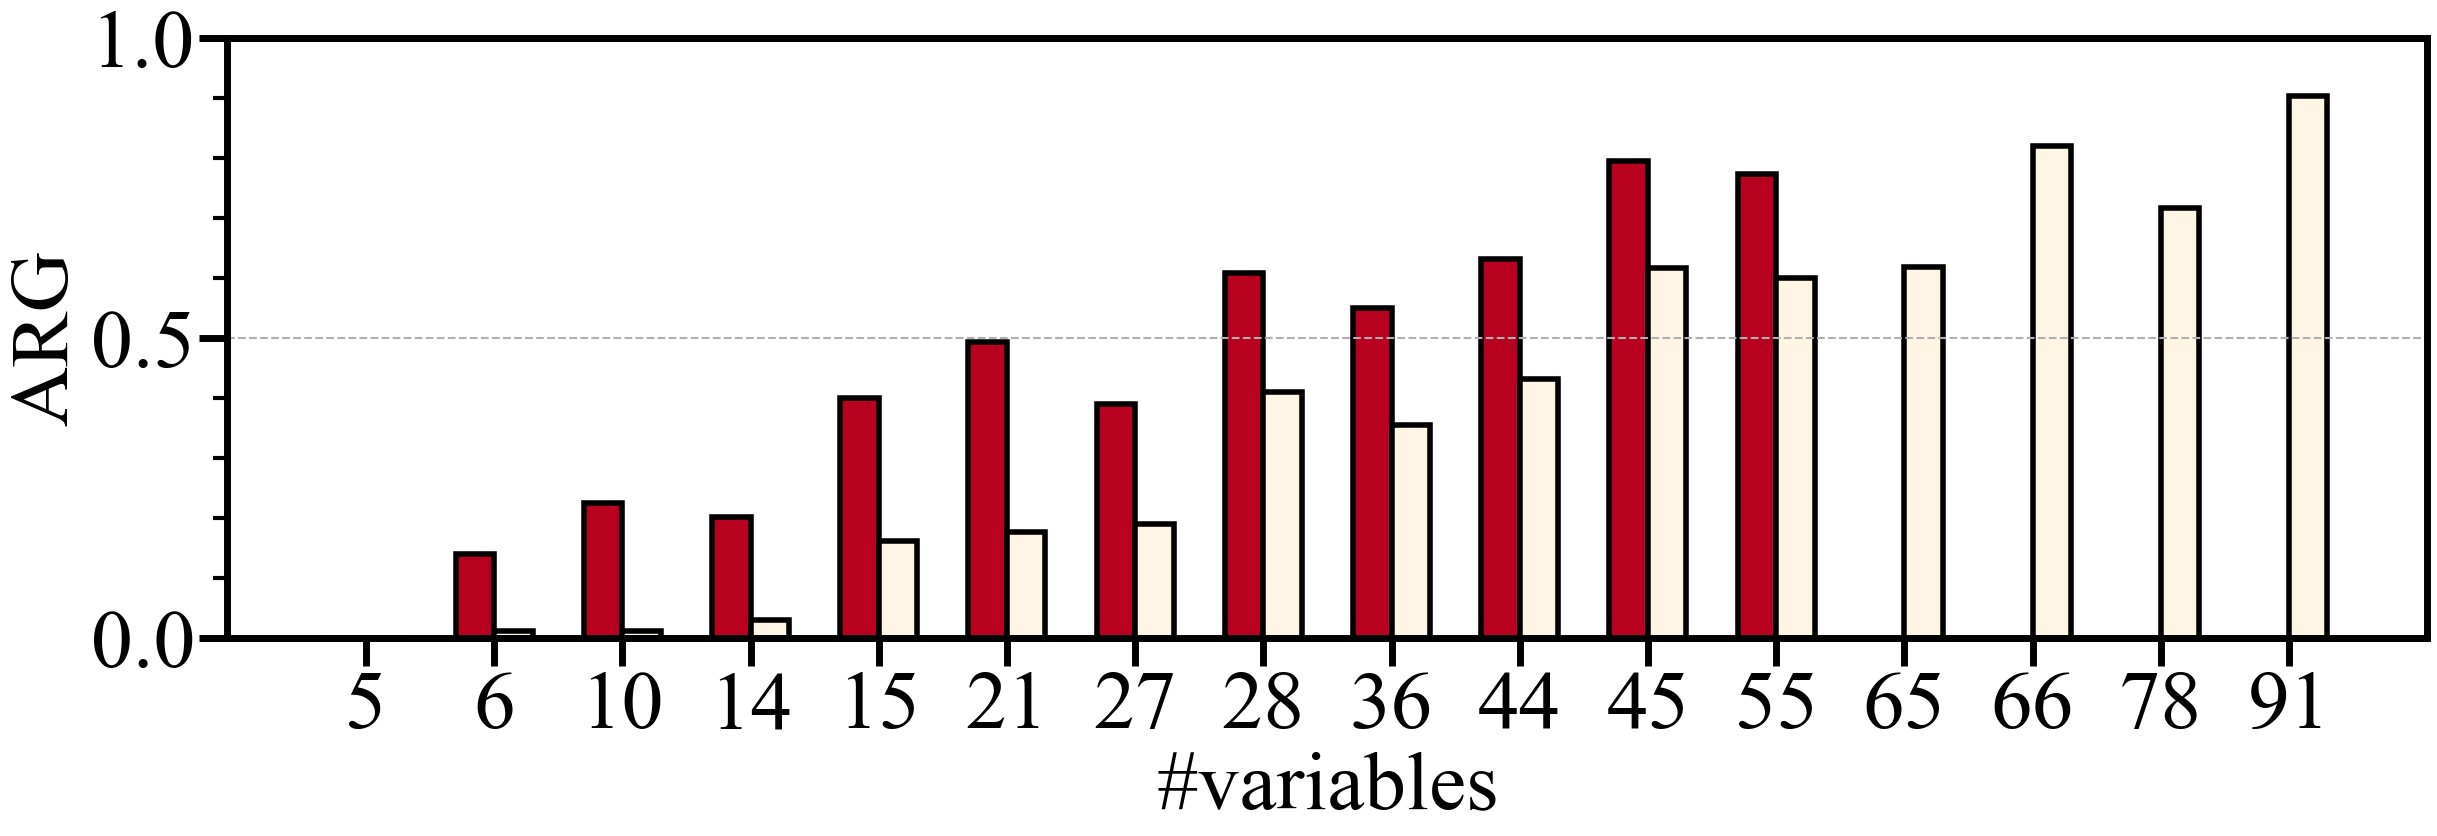

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Initialize the figure and axis settings
scale = 1
fig = plt.figure(figsize=(22*scale, 12*scale))  # Create a single subplot for ARG
ax1 = plt.axes((0, 0, 1, 0.5))  
# ax2 = plt.axes((0.6, 0, 0.4, 0.6))  

mpl.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Times New Roman',
    'font.size': 60,
    'axes.unicode_minus': False,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.linewidth': 5,
    'xtick.major.size': 20,
    'xtick.major.width': 5,
    'xtick.minor.size': 10,
    'xtick.minor.width': 3,
    'ytick.major.size': 20,
    'ytick.major.width': 5,
    'ytick.minor.size': 10,
    'ytick.minor.width': 3,
    "lines.markersize" : 35,
    "lines.markeredgewidth" : 4,
    "markers.fillstyle" : 'full',
    'lines.markerfacecolor': '#f8d941',
    'lines.markeredgecolor': 'black',
})

# Colors for each pkid and method
colors = ['#384B70','#6A9C89','#B8001F','#FFF5E4','#FFF']
colors_ = ['#B8001F','#FFF5E4','#FFF']


# Prepare data for plotting ARG per pkid and method
arg_data = pivot_df['ARG']  # Extract ARG data

# Set bar width and x positions
bar_width = 0.3
pkid_values = arg_data.index.get_level_values('variables').unique()  # Get unique pkid values
index = np.arange(len(pkid_values))  # X positions for the bars

# Create a bar chart for each method
for idx, method in enumerate(arg_data.columns):
    print(method)
    ax1.bar(index + idx * bar_width, arg_data[method].values, bar_width, 
            label=method, color=colors_[idx % len(colors_)], edgecolor="black", linewidth=4)
    
# arg_data2 = pivot_df['in_constraints_probs']  # Extract ARG data
# for idx, method in enumerate(arg_data2.columns):
#     print(method)
    # ax2.bar(index + idx * bar_width, arg_data2[method].values, bar_width, 
            # label=method, color=colors_[1], edgecolor="black", linewidth=4)
    
# Customize the plot
ax1.set_xlabel('#variables', fontsize=60)
ax1.set_ylabel('ARG', fontsize=60)
# ax2.set_xlabel('#variables', fontsize=60)
# ax2.set_ylabel('in_constraints_probs', fontsize=60)
# ax1.set_title('ARG Comparison for Each pkid and Method', fontsize=60)

# Set x-axis ticks and labels
ax1.set_xticks(index + bar_width * (len(arg_data.columns) / 2 - 0.5))
ax1.set_xticklabels(pkid_values)
# ax2.set_xticks(index + bar_width * (len(arg_data.columns) / 2 - 0.5))
# ax2.set_xticklabels(pkid_values)

# Add grid, legend, and style
ax1.grid(True, linestyle='--', linewidth=1.5, axis='y')
# ax1.set_xticks(range())
# ax2.grid(True, linestyle='--', linewidth=1.5, axis='y')
ax1.set_yticks([i / 10 for i in range(0, 11, 5)])
ax1.set_yticks([i / 10 for i in range(0, 11, 1)], minor=True)
# ax1.legend(loc='upper left', ncol=2, frameon=False, bbox_to_anchor=(0, 1.1, 1, 0.2), mode="expand", borderaxespad=0)

# Save and display the plot
plt.tight_layout()
plt.savefig('ARG_comparison_per_pkid_and_method.svg', bbox_inches='tight')
plt.show()


ChocoSolver
QtoSimplifySolver
ChocoSolver
QtoSimplifySolver


/tmp/ipykernel_99441/2659766719.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


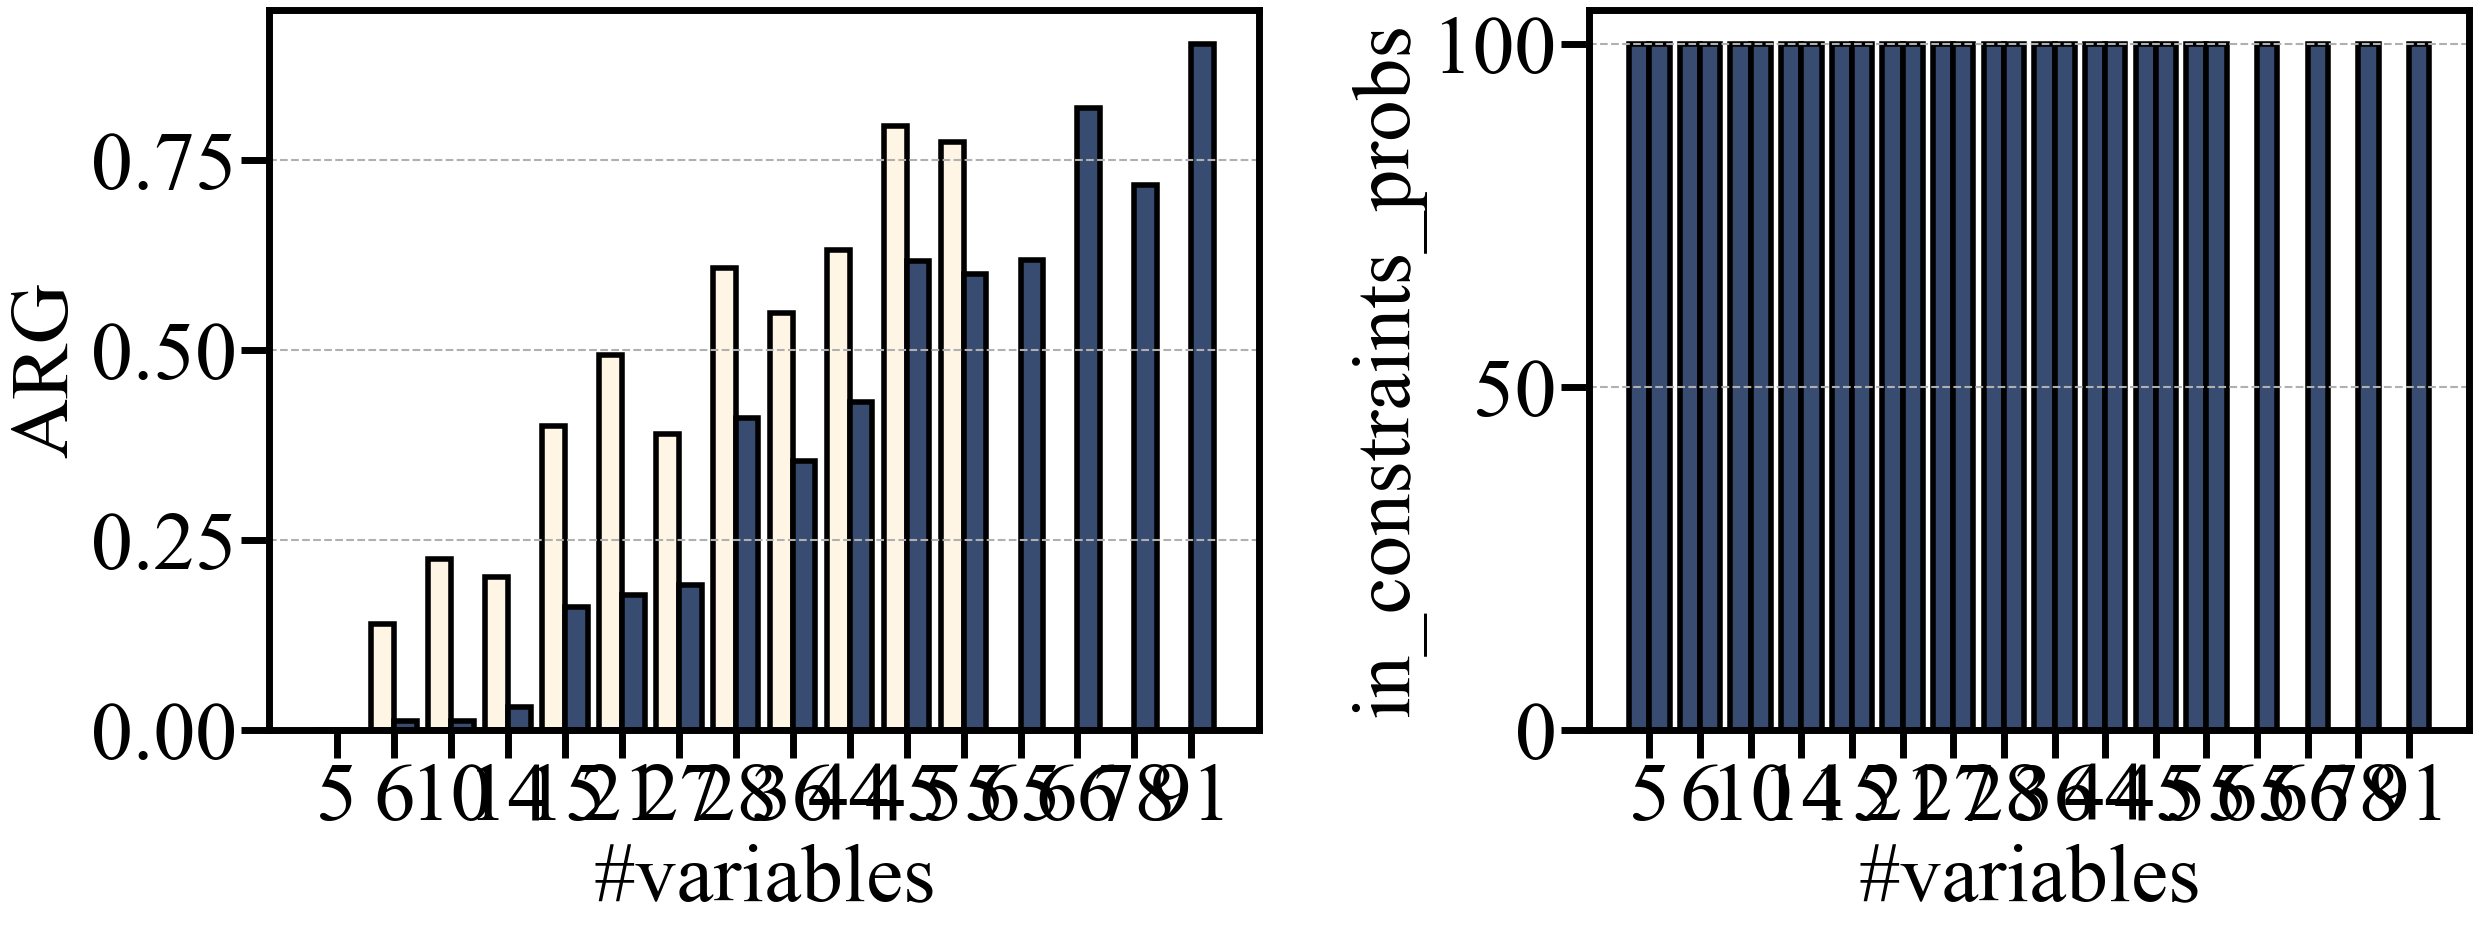

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Initialize the figure and axis settings
scale = 1
fig = plt.figure(figsize=(22*scale, 12*scale))  # Create a single subplot for ARG
ax1 = plt.axes((0, 0, 0.45, 0.6))  
ax2 = plt.axes((0.6, 0, 0.4, 0.6))  

mpl.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Times New Roman',
    'font.size': 60,
    'axes.unicode_minus': False,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.linewidth': 5,
    'xtick.major.size': 20,
    'xtick.major.width': 5,
    'xtick.minor.size': 10,
    'xtick.minor.width': 3,
    'ytick.major.size': 20,
    'ytick.major.width': 5,
    'ytick.minor.size': 10,
    'ytick.minor.width': 3,
    "lines.markersize" : 35,
    "lines.markeredgewidth" : 4,
    "markers.fillstyle" : 'full',
    'lines.markerfacecolor': '#f8d941',
    'lines.markeredgecolor': 'black',
})

# Colors for each pkid and method
colors = ['#384B70','#6A9C89','#B8001F','#FFF5E4','#FFF']
colors_ = ['#FFF5E4','#384B70','#FFF']


# Prepare data for plotting ARG per pkid and method
arg_data = pivot_df['ARG']  # Extract ARG data

# Set bar width and x positions
bar_width = 0.4
pkid_values = arg_data.index.get_level_values('variables').unique()  # Get unique pkid values
index = np.arange(len(pkid_values))  # X positions for the bars

# Create a bar chart for each method
for idx, method in enumerate(arg_data.columns):
    print(method)
    ax1.bar(index + idx * bar_width, arg_data[method].values, bar_width, 
            label=method, color=colors_[idx % len(colors_)], edgecolor="black", linewidth=4)
    
arg_data2 = pivot_df['in_constraints_probs']  # Extract ARG data
for idx, method in enumerate(arg_data2.columns):
    print(method)
    ax2.bar(index + idx * bar_width, arg_data2[method].values, bar_width, 
            label=method, color=colors_[1], edgecolor="black", linewidth=4)
    
# Customize the plot
ax1.set_xlabel('#variables', fontsize=60)
ax1.set_ylabel('ARG', fontsize=60)
ax2.set_xlabel('#variables', fontsize=60)
ax2.set_ylabel('in_constraints_probs', fontsize=60)
# ax1.set_title('ARG Comparison for Each pkid and Method', fontsize=60)

# Set x-axis ticks and labels
ax1.set_xticks(index + bar_width * (len(arg_data.columns) / 2 - 0.5))
ax1.set_xticklabels(pkid_values)
ax2.set_xticks(index + bar_width * (len(arg_data.columns) / 2 - 0.5))
ax2.set_xticklabels(pkid_values)

# Add grid, legend, and style
ax1.grid(True, linestyle='--', linewidth=1.5, axis='y')
ax2.grid(True, linestyle='--', linewidth=1.5, axis='y')

# ax1.legend(loc='upper left', ncol=2, frameon=False, bbox_to_anchor=(0, 1.1, 1, 0.2), mode="expand", borderaxespad=0)

# Save and display the plot
plt.tight_layout()
# plt.savefig('ARG_comparison_per_pkid_and_method.svg', bbox_inches='tight')
plt.show()
